In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

random.seed(12)

data = pd.read_csv('/content/drive/MyDrive/thesis/Redo/feature selection/overlaping Optimal biomarkers evaluation/data/augmented_beta_severity_lfc_1_nosm_fake_neighbor_vectors_all_biomarkers_only.csv')

y_train = data.iloc[:, -1].values
X_train = data.iloc[:, :-1].values

#RF with 5-fold cv evaluation of the cwgan-gp augmented dataset
clf_true = RandomForestClassifier(n_estimators=100 , random_state=42,)

cv_scores_accuracy = cross_val_score(clf_true, X_train, y_train, cv=5)

print("Cross-Validation Accuracy Scores:", cv_scores_accuracy)
print("Mean Accuracy:", np.mean(cv_scores_accuracy))


Cross-Validation Accuracy Scores: [0.83783784 0.98198198 0.96396396 0.99090909 0.99090909]
Mean Accuracy: 0.9531203931203931


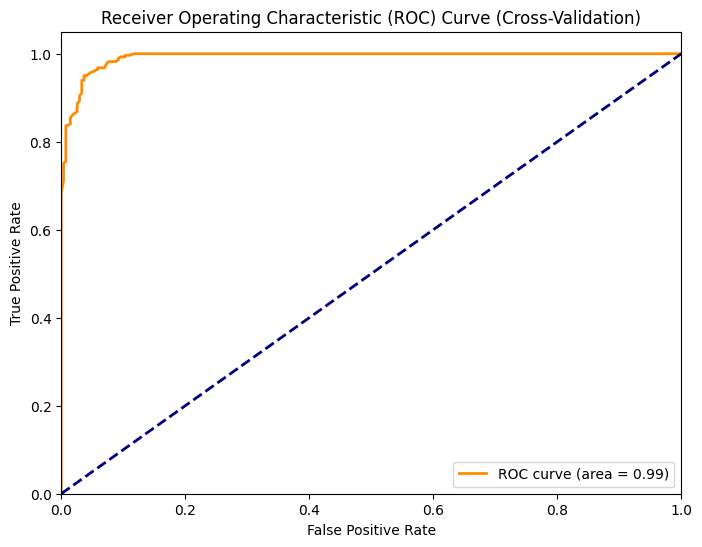

In [3]:
# ROC curve evaluation
y_true_prob_cv_true = cross_val_predict(clf_true, X_train, y_train, cv=5, method='predict_proba')[:, 1]

fpr_cv_true, tpr_cv_true, thresholds_cv_true = roc_curve(y_train, y_true_prob_cv_true)

roc_auc_cv_true = roc_auc_score(y_train, y_true_prob_cv_true)

plt.figure(figsize=(8, 6))
plt.plot(fpr_cv_true, tpr_cv_true, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_cv_true))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Cross-Validation)')
plt.legend(loc="lower right")
plt.show()

In [4]:
# Top 5 features
cv_results_true = cross_validate(clf_true, X_train, y_train, cv=5, return_train_score=False, return_estimator=True)

clf_true_fitted = cv_results_true['estimator'][-1]

feature_importances = clf_true_fitted.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': data.columns[:-1], 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_5_features = feature_importance_df.head(5)

print("Top 5 Features:")
print(top_5_features)


Top 5 Features:
    Feature  Importance
26   CCDC65    0.062765
210  ZNF239    0.056777
134  OTUD7A    0.054512
40   CEP126    0.041386
188   TCTN2    0.036861


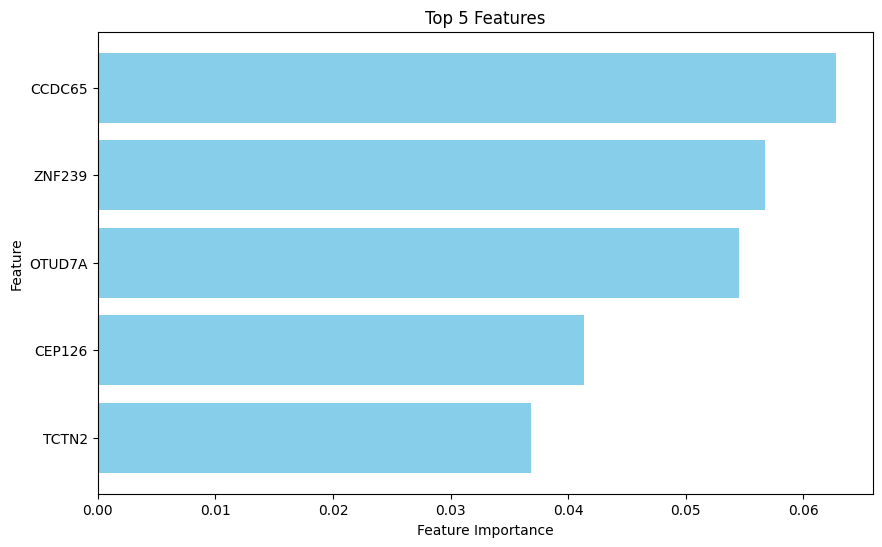

In [5]:
# Plotting the top5 features
plt.figure(figsize=(10, 6))
plt.barh(top_5_features['Feature'], top_5_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 5 Features')
plt.gca().invert_yaxis()
plt.show()

Top 10 Features:
      Feature  Importance
26     CCDC65    0.062765
210    ZNF239    0.056777
134    OTUD7A    0.054512
40     CEP126    0.041386
188     TCTN2    0.036861
100  KIAA1671    0.036148
43      CLIC5    0.035017
171   SLC4A10    0.034164
112    MAGEE1    0.029251
145     PTCH1    0.028963


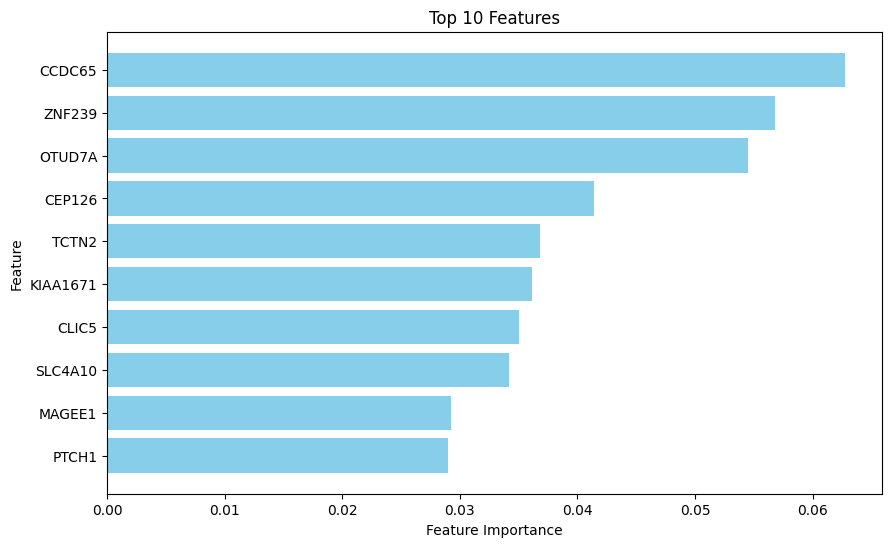

In [6]:
# plotting the  top 10 features

top_10_features = feature_importance_df.head(10)

print("Top 10 Features:")
print(top_10_features)

plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Features')
plt.gca().invert_yaxis()
plt.show()

In [7]:
# RF using only the top 5 features, evaluation with 5-fold cross validation
clf_top5 = RandomForestClassifier(n_estimators=100)
X_train_top5 = data[top_5_features['Feature']].values


cv_scores_accuracy_top5 = cross_val_score(clf_top5, X_train_top5, y_train, cv=5)

print("Cross-Validation Accuracy Scores:", cv_scores_accuracy_top5)
print("Mean Accuracy:", np.mean(cv_scores_accuracy_top5))



Cross-Validation Accuracy Scores: [0.81081081 0.97297297 0.95495495 0.99090909 0.99090909]
Mean Accuracy: 0.9441113841113842


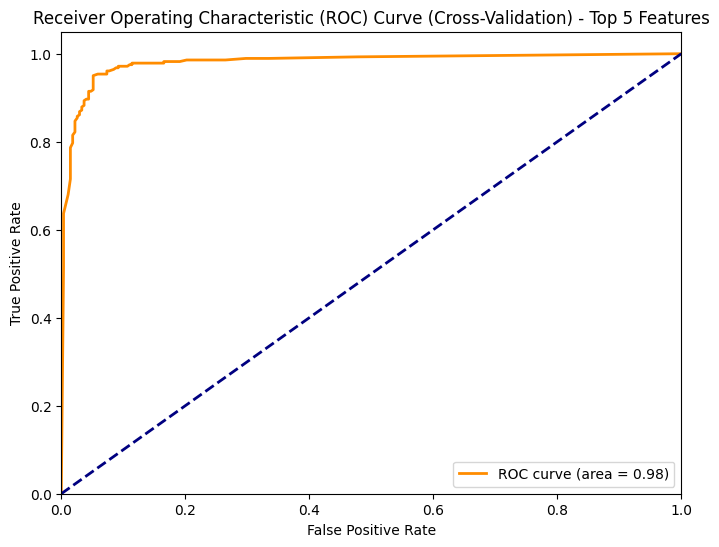

In [8]:
# ROC curve evaluation of the top 5 features
y_true_prob_cv_top5 = cross_val_predict(clf_top5, X_train_top5, y_train, cv=5, method='predict_proba')[:, 1]

fpr_cv_top5, tpr_cv_top5, thresholds_cv_top5 = roc_curve(y_train, y_true_prob_cv_top5)

roc_auc_cv_top5 = roc_auc_score(y_train, y_true_prob_cv_top5)

plt.figure(figsize=(8, 6))
plt.plot(fpr_cv_top5, tpr_cv_top5, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_cv_top5))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Cross-Validation) - Top 5 Features')
plt.legend(loc="lower right")
plt.show()

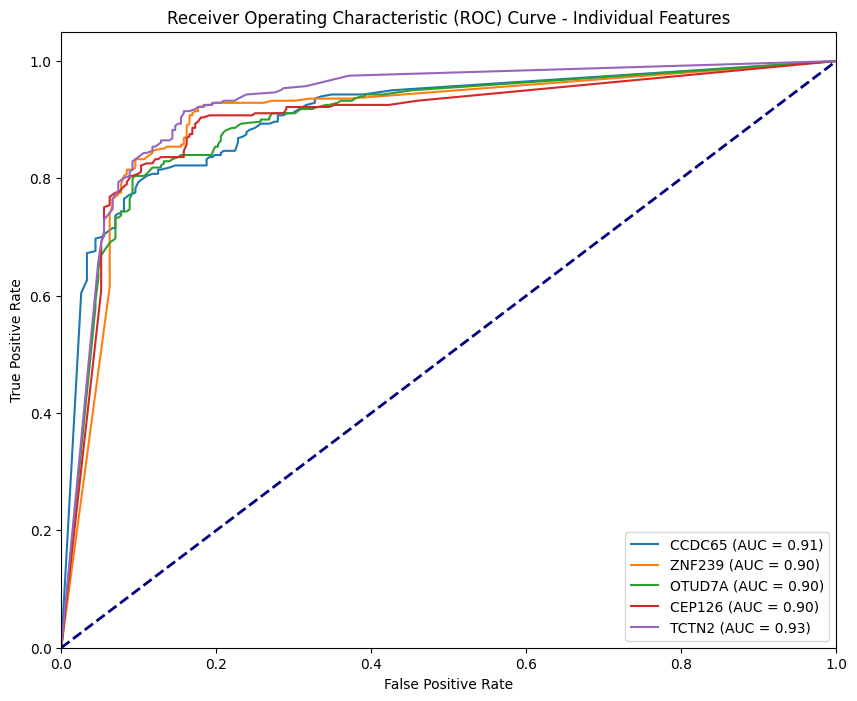

In [9]:
# ROC curve of the top 5 fetaures evaluated individually

plt.figure(figsize=(10, 8))
for i, feature in enumerate(top_5_features['Feature']):
    X_train_single_feature = data[[feature]].values
    y_true_prob_cv_single_feature = cross_val_predict(clf_top5, X_train_single_feature, y_train, cv=5, method='predict_proba')[:, 1]

    fpr_cv_single_feature, tpr_cv_single_feature, _ = roc_curve(y_train, y_true_prob_cv_single_feature)

    auc_value = roc_auc_score(y_train, y_true_prob_cv_single_feature)

    plt.plot(fpr_cv_single_feature, tpr_cv_single_feature, label=f'{feature} (AUC = {auc_value:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Individual Features')

plt.legend(loc="lower right")
plt.show()